# The Robot World

A robot, much like you, perceives the world through its "senses." For example, self-driving cars use video, radar, and Lidar, to observe the world around them. As cars gather data, they build up a 3D world of observations that tells the car where it is, where other objects (like trees, pedestrians, and other vehicles) are, and where it should be going! 

In this section, we'll be working with first a 1D then a 2D representation of the world for simplicity, and because two dimensions are often all you'll need to solve a certain problem. 
* You'll be given a set of quizzes to solve to build up your understanding of robot localization. 
* Try your best to solve these quizzes and consult the solution if you get stuck or want to confirm your answer.

*The solution will always be in either 1. a notebook which can be accessed in the `jupyter` directory in the top-left or 2. the video that comes after a quiz.* 

<img src="files/images/lidar.png" width="50%" height="50%">


These grid representations of the environment are known as **discrete** representations. Discrete just means a limited number of places a robot can be (ex. in one grid cell). That's because robots, and autonomous vehicles like self-driving cars, use maps to figure out where they are, and maps lend themselves to being divided up into grids and sections.

You'll see **continuous** probability distributions when locating objects that are moving around the robot. Continuous means that these objects can be anywhere around the robot and their movement is smooth.

So, let's start with the 1D case.

### Robot World 1-D

First, imagine you have a robot living in a 1-D world. You can think of a 1D world as a one-lane road. 

<img src="images/road_1.png" width="50%" height="50%">

We can treat this road as an array, and break it up into grid cells for a robot to understand. In this case, the road is a 1D grid with 5 different spaces. The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side (this is known as a cyclic world).

<img src="images/numbered_grid.png" width="50%" height="50%">

### Uniform Distribution

The robot has a map so that it knows there are only 5 spaces in this 1D world. However, it hasn't sensed anything or moved. For a length of 5 cells (a list of 5 values), what is the probability distribution, `p`, that the robot is in any one of these locations?

Since the robot does not know where it is at first, the probability of being in any space is the same! This is a probability distribution and so the sum of all these probabilities should be equal to 1, so `1/5 spaces = 0.2`. A distribution in which all the probabilities are the same (and we have maximum uncertainty) is called a **uniform distribution**.


In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# uniform distribution for 5 grid cells
# we use "p" to represent probability
p = [0.2, 0.2, 0.2, 0.2, 0.2]
print(p)


[0.2, 0.2, 0.2, 0.2, 0.2]


I'll also include a helper function for visualizing this distribution. The below function, `display_map` will output a bar chart showing the probability that a robot is in each grid space. The y-axis has a range of 0 to 1 for the range of probabilities. For a uniform distribution, this will look like a flat line. You can choose the width of each bar to be <= 1 should you want to space these out. 

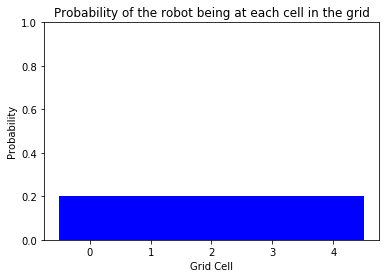

In [3]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

# call function on grid, p, from before
display_map(p)

Now, what about if the world was 8 grid cells in length instead of 5?

### QUIZ: Write a function that takes in the number of spaces in the robot's world (in this case 8), and returns the initial probability distribution `p` that the robot is in each space. 

This function should store the probabilities in a list. So in this example, there would be a list with 8 probabilities.

In [4]:
# ex. initialize_robot(5) = [0.2, 0.2, 0.2, 0.2, 0.2]
def initialize_robot(grid_length):
    ''' Takes in a grid length and returns 
       a uniform distribution of location probabilities'''
    p = []
    # create a list that has the value of 1/grid_length for each cell
    for i in range(grid_length):
        p.append(1.0/grid_length)
    return p


[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]


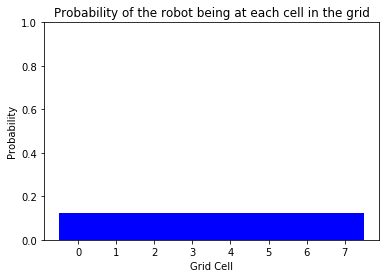

In [5]:
p = initialize_robot(8)
print(p)
display_map(p)

Now that you know how a robot initially sees a simple 1D world, let's learn about how it can locate itself by moving around and sensing it's environment!